In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [25]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/LocalTestsO2/dplustree/data/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        # if 'O2hfcanddplite' in key:
        # if 'O2hfcanddpml' in key:
        if 'O2hfcanddplite' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

        if 'O2hfcanddpml' in key:
            print(key)
            dfDataLite = f[key].arrays(library='pd')
            dfsDataLite.append(dfDataLite)

combined_df_data = pd.concat([df for df in dfsData], ignore_index=True)
combined_df_data_lite = pd.concat([df for df in dfsDataLite], ignore_index=True)

print(f"len(combined_df_data): {len(combined_df_data)}")
print(f"len(combined_df_data_lite): {len(combined_df_data_lite)}")

['DF_2261906130553975;1', 'DF_2261906130553975/O2hfcanddplite;1', 'DF_2261906130553975/O2hfcanddpml;1', 'DF_2261906130554103;1', 'DF_2261906130554103/O2hfcanddplite;1', 'DF_2261906130554103/O2hfcanddpml;1', 'DF_2261906130554231;1', 'DF_2261906130554231/O2hfcanddplite;1', 'DF_2261906130554231/O2hfcanddpml;1', 'DF_2261906130554359;1', 'DF_2261906130554359/O2hfcanddplite;1', 'DF_2261906130554359/O2hfcanddpml;1', 'DF_2261906130554487;1', 'DF_2261906130554487/O2hfcanddplite;1', 'DF_2261906130554487/O2hfcanddpml;1', 'DF_2261906080643575;1', 'DF_2261906080643575/O2hfcanddplite;1', 'DF_2261906080643575/O2hfcanddpml;1', 'DF_2261906080643703;1', 'DF_2261906080643703/O2hfcanddplite;1', 'DF_2261906080643703/O2hfcanddpml;1', 'DF_2261906080643831;1', 'DF_2261906080643831/O2hfcanddplite;1', 'DF_2261906080643831/O2hfcanddpml;1', 'DF_2261906080643959;1', 'DF_2261906080643959/O2hfcanddplite;1', 'DF_2261906080643959/O2hfcanddpml;1', 'DF_2261906080644087;1', 'DF_2261906080644087/O2hfcanddplite;1', 'DF_226

In [26]:
combined_df_data.columns
print(len(combined_df_data))
print(combined_df_data.columns)

912
Index(['fChi2PCA', 'fDecayLength', 'fDecayLengthXY', 'fDecayLengthNormalised',
       'fDecayLengthXYNormalised', 'fPtProng0', 'fPtProng1', 'fPtProng2',
       'fImpactParameter0', 'fImpactParameter1', 'fImpactParameter2',
       'fImpactParameterZ0', 'fImpactParameterZ1', 'fImpactParameterZ2',
       'fNSigTpcPi0', 'fNSigTpcKa0', 'fNSigTofPi0', 'fNSigTofKa0',
       'fNSigTpcTofPi0', 'fNSigTpcTofKa0', 'fNSigTpcPi1', 'fNSigTpcKa1',
       'fNSigTofPi1', 'fNSigTofKa1', 'fNSigTpcTofPi1', 'fNSigTpcTofKa1',
       'fNSigTpcPi2', 'fNSigTpcKa2', 'fNSigTofPi2', 'fNSigTofKa2',
       'fNSigTpcTofPi2', 'fNSigTpcTofKa2', 'fCandidateSelFlag', 'fM', 'fPt',
       'fCpa', 'fCpaXY', 'fMaxNormalisedDeltaIP', 'fEta', 'fPhi', 'fY',
       'fFlagMcMatchRec', 'fOriginMcRec', 'fFlagMcDecayChanRec'],
      dtype='object')


In [27]:
unique_values = combined_df_data['fFlagMcMatchRec'].unique()
print("Unique values in fFlagMcMatchRec:", unique_values)

Unique values in fFlagMcMatchRec: [0]


In [28]:
unique_values = combined_df_data['fFlagMcDecayChanRec'].unique()
print("Unique values in fFlagMcDecayChanRec:", unique_values)

Unique values in fFlagMcDecayChanRec: [0]


/tmp/ipykernel_3343062/2423839836.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


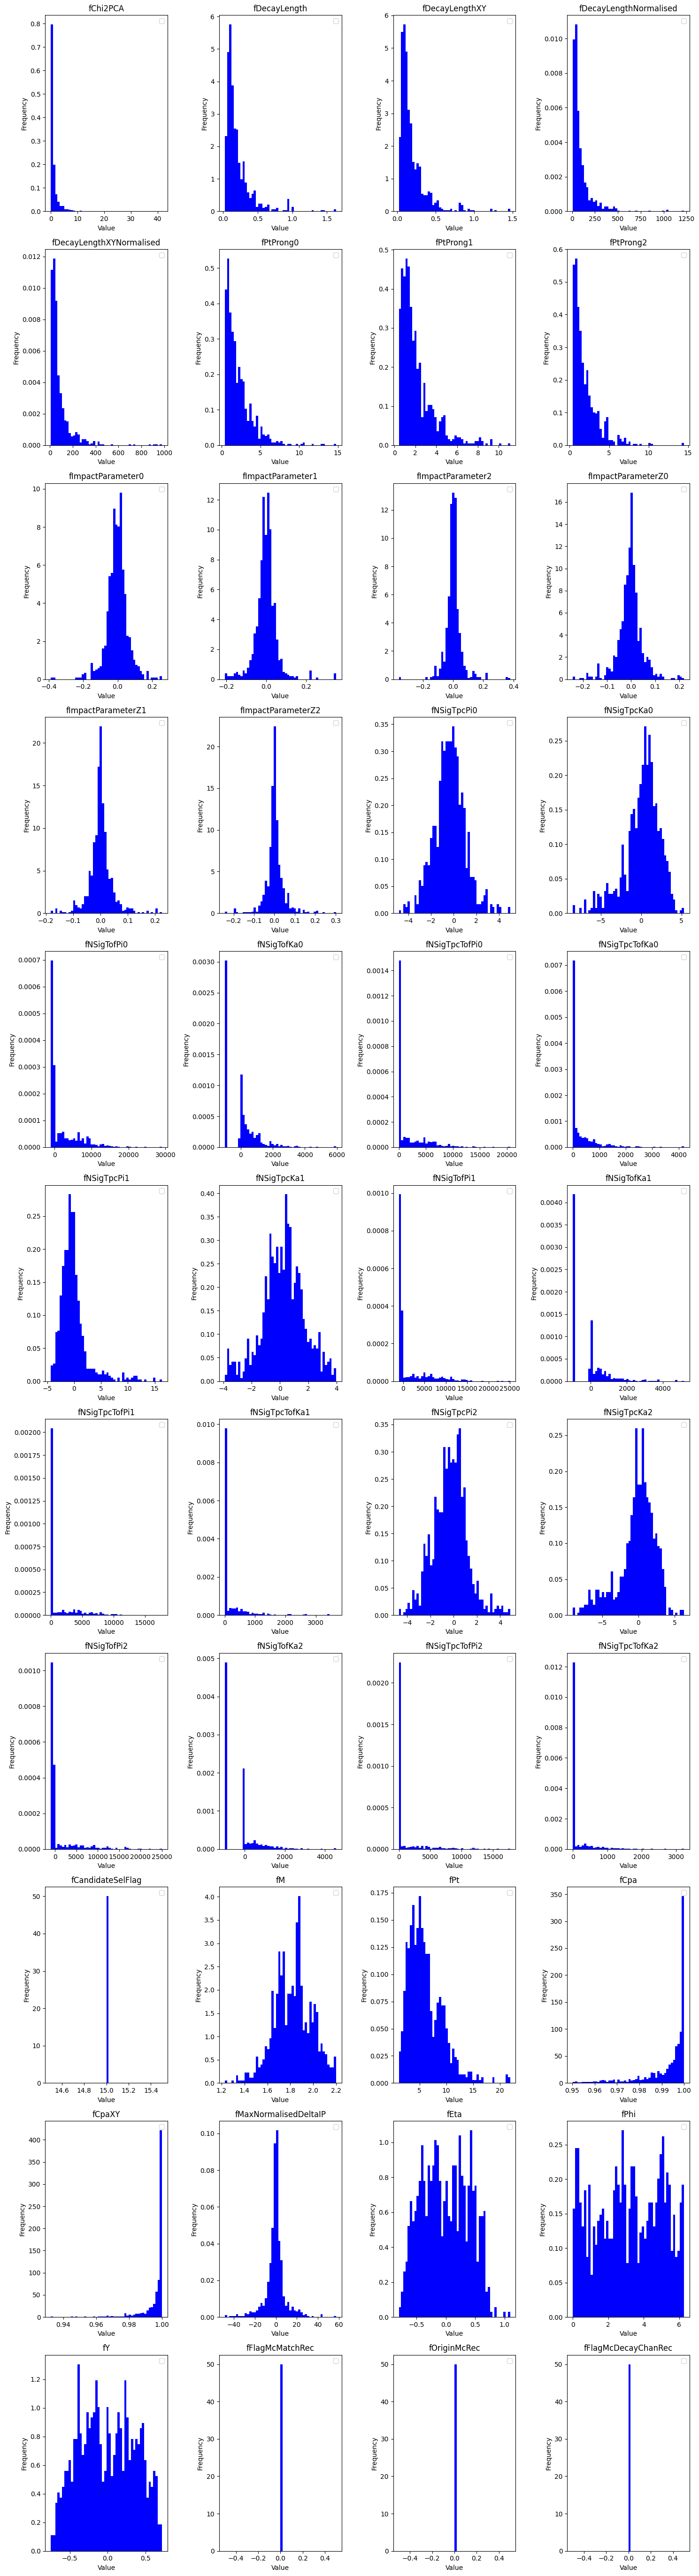

In [29]:
n_columns = len(combined_df_data.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(combined_df_data.columns):
    axes[i].hist(combined_df_data[column], bins=50, color='blue', density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Series([], Name: fFlagMcDecayChanRec, dtype: int8)


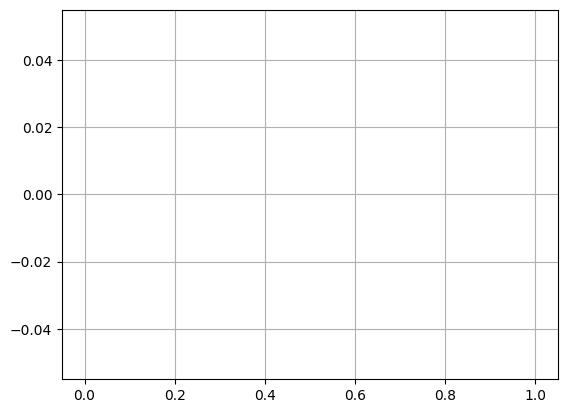

In [30]:
combined_df_data.query('abs(fFlagMcMatchRec) == 16')['fM'].hist(bins=8, color='blue', alpha=0.5, label='Matched')
queried_dstars = combined_df_data.query('abs(fFlagMcMatchRec) == 16')
print(queried_dstars['fFlagMcDecayChanRec'])

<Axes: >

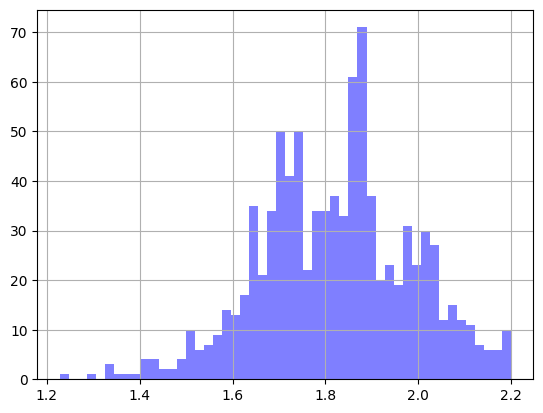

In [31]:
combined_df_data.query('abs(fFlagMcDecayChanRec) == 0')['fM'].hist(bins=50, color='blue', alpha=0.5, label='Matched')

<Axes: >

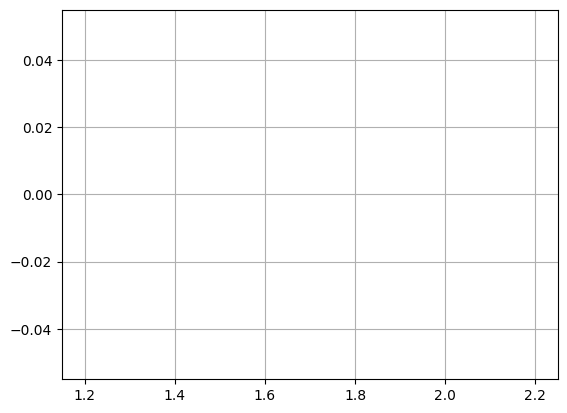

In [32]:
combined_df_data.query('abs(fFlagMcDecayChanRec) == 1')['fM'].hist(bins=50, range=(1.2,2.2), color='blue', alpha=0.5, label='Matched')

<Axes: >

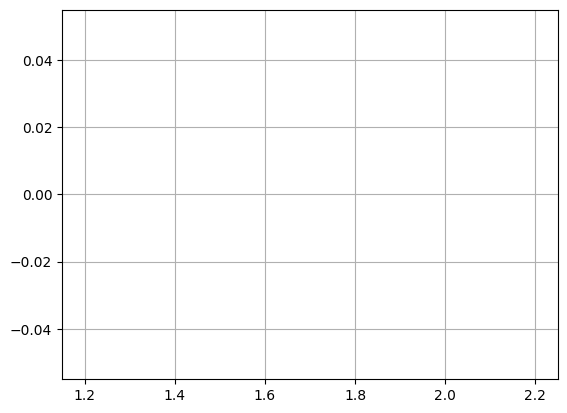

In [33]:
combined_df_data.query('abs(fFlagMcDecayChanRec) == 2')['fM'].hist(bins=50, range=(1.2,2.2), color='blue', alpha=0.5, label='Matched')

/home/mdicosta/virtenvpy/phys/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: >

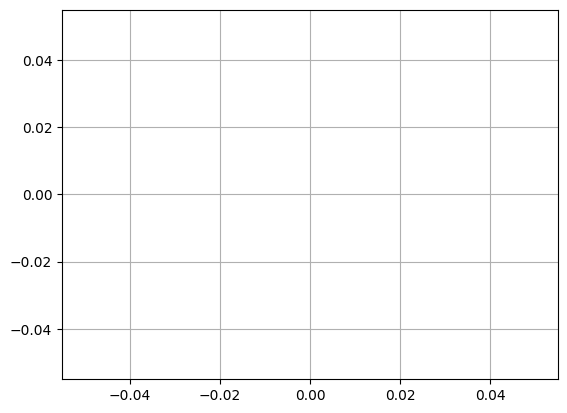

In [34]:
combined_df_data.query('abs(fFlagMcDecayChanRec) == 3')['fM'].hist(bins=50, color='blue', alpha=0.5, density=True, label='Matched')